<h1>Unsupervised Machine Learning (ML Professional Sertificate) - Final Project</h1>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
df = pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [6]:
df.isna().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [7]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [8]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [9]:
df.isna().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int64
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [11]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [12]:
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

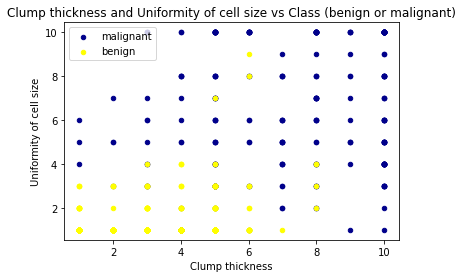

In [57]:
ax = df[df['Class'] == 4].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.title('Clump thickness and Uniformity of cell size vs Class (benign or malignant)')
plt.xlabel('Clump thickness')
plt.ylabel('Uniformity of cell size')
plt.show()

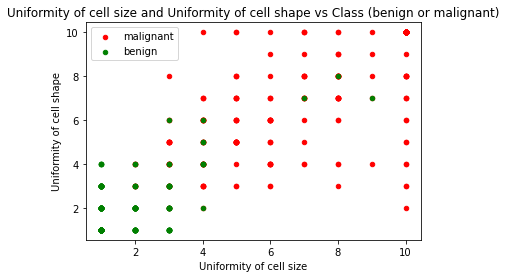

In [58]:
ax = df[df['Class'] == 4].plot(kind='scatter', x='UnifSize', y='UnifShape', color='Red', label='malignant');
df[df['Class'] == 2].plot(kind='scatter', x='UnifSize', y='UnifShape', color='Green', label='benign', ax=ax);
plt.title('Uniformity of cell size and Uniformity of cell shape vs Class (benign or malignant)')
plt.xlabel('Uniformity of cell size')
plt.ylabel('Uniformity of cell shape')
plt.show()

In [59]:
import scipy.stats
scipy.stats.pearsonr(df['Clump'], df['Class'])

(0.7147899263221598, 7.292503838467768e-108)

In [60]:
scipy.stats.pearsonr(df['UnifSize'], df['Class'])

(0.8208014428258759, 8.922226282455344e-168)

In [61]:
scipy.stats.pearsonr(df['UnifShape'], df['Class'])

(0.8218909476888686, 1.3694249229285485e-168)

In [62]:
scipy.stats.pearsonr(df['MargAdh'], df['Class'])

(0.7062941354660847, 2.979777609009213e-104)

In [63]:
scipy.stats.pearsonr(df['SingEpiSize'], df['Class'])

(0.6909581590873207, 4.733539740955148e-98)

In [64]:
scipy.stats.pearsonr(df['BareNuc'], df['Class'])

(0.8226958729964621, 3.401103273246691e-169)

In [65]:
scipy.stats.pearsonr(df['BlandChrom'], df['Class'])

(0.7582275545334312, 1.267711791682159e-128)

In [66]:
scipy.stats.pearsonr(df['NormNucl'], df['Class'])

(0.7186771878756352, 1.465645368097008e-109)

In [67]:
scipy.stats.pearsonr(df['Mit'], df['Class'])

(0.42344792129521247, 4.304039950943738e-31)

In [75]:
from scipy.stats import pearsonr
corr = list()

corr.append(pearsonr(df['Clump'], df['Class'])[0])
corr.append(pearsonr(df['UnifSize'], df['Class'])[0])
corr.append(pearsonr(df['UnifShape'], df['Class'])[0])
corr.append(pearsonr(df['MargAdh'], df['Class'])[0])
corr.append(pearsonr(df['SingEpiSize'], df['Class'])[0])
corr.append(pearsonr(df['BareNuc'], df['Class'])[0])
corr.append(pearsonr(df['BlandChrom'], df['Class'])[0])
corr.append(pearsonr(df['NormNucl'], df['Class'])[0])
corr.append(pearsonr(df['Mit'], df['Class'])[0])

p_value = list()

p_value.append(pearsonr(df['Clump'], df['Class'])[1])
p_value.append(pearsonr(df['UnifSize'], df['Class'])[1])
p_value.append(pearsonr(df['UnifShape'], df['Class'])[1])
p_value.append(pearsonr(df['MargAdh'], df['Class'])[1])
p_value.append(pearsonr(df['SingEpiSize'], df['Class'])[1])
p_value.append(pearsonr(df['BareNuc'], df['Class'])[1])
p_value.append(pearsonr(df['BlandChrom'], df['Class'])[1])
p_value.append(pearsonr(df['NormNucl'], df['Class'])[1])
p_value.append(pearsonr(df['Mit'], df['Class'])[1])

labels = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']

In [76]:
import pandas as pd
data = {'Feature':labels, 'Pearson correlation':corr, 'P-value':p_value}
corr_df = pd.DataFrame(data)
corr_df

,Feature,Pearson correlation,P-value
0,Clump,0.714790,7.292504e-108
1,UnifSize,0.820801,8.922226e-168
2,UnifShape,0.821891,1.369425e-168
3,MargAdh,0.706294,2.979778e-104
4,SingEpiSize,0.690958,4.733540e-98
5,BareNuc,0.822696,3.401103e-169
6,BlandChrom,0.758228,1.267712e-128
7,NormNucl,0.718677,1.465645e-109
8,Mit,0.423448,4.304040e-31


In [44]:
df['class'] = df['Class'].apply(lambda x: 'benign' if (x==2)  else 'malignant')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class,kmeans,agglom-w,agglom-c,agglom-a,agglom-s,class
0,1000025,5,1,1,1,2,1,3,1,1,2,0,1,0,1,0,benign
1,1002945,5,4,4,5,7,10,3,2,1,2,1,0,0,0,0,benign
2,1015425,3,1,1,1,2,2,3,1,1,2,0,1,0,1,0,benign
3,1016277,6,8,8,1,3,4,3,7,1,2,1,0,1,0,0,benign
4,1017023,4,1,1,3,2,1,3,1,1,2,0,1,0,1,0,benign


In [45]:
tr_columns = [x for x in df.columns if x not in ['ID', 'Class', 'class']]

<h2>1. K-Means</h2>

In [46]:
from sklearn.cluster import KMeans
km = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)
km = km.fit(df[tr_columns])

df['kmeans'] = km.predict(df[tr_columns])

In [47]:
(df[['class','kmeans']]
 .groupby(['class','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
class     kmeans        
benign    0            9
          1          435
malignant 0          221
          1           18

In [18]:
km_list = list()

for clust in range(1,21):
    km2 = KMeans(n_clusters=clust, random_state=42)
    km2 = km2.fit(df[tr_columns])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km2.inertia_,
                              'model': km2}))

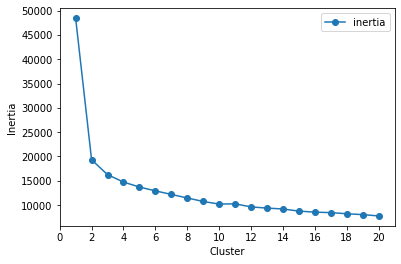

In [19]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

<h2>2. Hierarchical Agglomerative Clustering (HAC)</h2>

<h3>2.1. HAC with ward linkage</h3>

In [20]:
from sklearn.cluster import AgglomerativeClustering
ag_1 = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag_1 = ag_1.fit(df[tr_columns])
df['agglom-w'] = ag_1.fit_predict(df[tr_columns])

In [48]:
(df[['class','agglom-w']]
 .groupby(['class','agglom-w'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
class     agglom-w        
benign    0             22
          1            422
malignant 0            238
          1              1

<h3>2.2. HAC with complete linkage</h3>

In [22]:
ag_2 = AgglomerativeClustering(n_clusters=2, linkage='complete', compute_full_tree=True)
ag_2 = ag_2.fit(df[tr_columns])
df['agglom-c'] = ag_2.fit_predict(df[tr_columns])

In [51]:
(df[['class','agglom-c']]
 .groupby(['class','agglom-c'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
class     agglom-c        
benign    0            443
          1              1
malignant 0            128
          1            111

<h3>2.3. HAC with average linkage</h3>

In [24]:
ag_3 = AgglomerativeClustering(n_clusters=2, linkage='average', compute_full_tree=True)
ag_3 = ag_3.fit(df[tr_columns])
df['agglom-a'] = ag_3.fit_predict(df[tr_columns])

In [50]:
(df[['class','agglom-a']]
 .groupby(['class','agglom-a'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
class     agglom-a        
benign    0              8
          1            436
malignant 0            208
          1             31

<h3>3.4. HAC with single linkage</h3>

In [26]:
ag_4 = AgglomerativeClustering(n_clusters=2, linkage='single', compute_full_tree=True)
ag_4 = ag_4.fit(df[tr_columns])
df['agglom-s'] = ag_4.fit_predict(df[tr_columns])

In [52]:
(df[['class','agglom-s']]
 .groupby(['class','agglom-s'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
class     agglom-s        
benign    0            444
malignant 0            238
          1              1

In [55]:
(df[['class','kmeans', 'agglom-w', 'agglom-c', 'agglom-a', 'agglom-s']]
 .groupby(['class','kmeans', 'agglom-w', 'agglom-c', 'agglom-a', 'agglom-s'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
class     kmeans agglom-w agglom-c agglom-a agglom-s        
benign    0      0        0        0        0              6
                                   1        0              2
                          1        0        0              1
          1      0        0        1        0             13
                 1        0        0        0              1
                                   1        0            421
malignant 0      0        0        0        0             97
                                   1        0             13
                          1        0        0            110
                                            1              1
          1      0        0        1        0             17
                 1        0        1        0              1

In [29]:
from sklearn import metrics

In [54]:
metrics.adjusted_rand_score(df['kmeans'], df['Class'])

0.8464675664733539

In [31]:
metrics.adjusted_rand_score(df['agglom-w'], df['Class'])

0.8689991723757481

In [32]:
metrics.adjusted_rand_score(df['agglom-c'], df['Class'])

0.3607233480946612

In [33]:
metrics.adjusted_rand_score(df['agglom-a'], df['Class'])

0.7817305098400615

In [34]:
metrics.adjusted_rand_score(df['agglom-s'], df['Class'])

0.00251025358056564

In [35]:
metrics.fowlkes_mallows_score(df['kmeans'], df['Class'])

0.9307035471794133

In [36]:
metrics.fowlkes_mallows_score(df['agglom-w'], df['Class'])

0.9393219468225392

In [37]:
metrics.fowlkes_mallows_score(df['agglom-c'], df['Class'])

0.7661738305070623

In [38]:
metrics.fowlkes_mallows_score(df['agglom-a'], df['Class'])

0.9031442352470486

In [39]:
metrics.fowlkes_mallows_score(df['agglom-s'], df['Class'])

0.7375145782650321

| Model                  | Adjusted Rand | Fowlkes Mallows  |
| ---------------------- | ------------- | ---------------- |
| K-Means                |     0.8465    |     0.9307       |
| HAC (ward linkage)     |     0.8690    |     0.9393       |
| HAC (complete linkage) |     0.3607    |     0.7662       |
| HAC (average linkage)  |     0.7817    |     0.9031       |
| HAC (single linkage)   |     0.0025    |     0.7375       |